# How to Draw an Estimated Umpire Strikezone with Python
## Grant Cloud## ISYE 4133 Applications

<p>This repo is a short tutorial on how to use Support Vector Machines to create a very simple umpire strikezone model. The provided data is a sample of one professional umpire's calls (name removed for confidentiality) over several games in 2018. This is intended to be a foundation for further umpire strikezone exploration in Python. There are several well known factors that impact umpire strikezones like count, batter handedness, and catcher that are not accounted for in this simple tutorial.</p>

<p>imports</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
sns.set(style="darkgrid")
sns.set_palette("bright")

<p>load the data</p>

In [2]:
df = pd.read_csv('data/sample_ump.csv')
df.head(5) # this line is just to preview the data

,BatterSide,Umpire,PlateLocSide,PlateLocHeight,PitchCall
0,Right,Ump1,-0.727990,2.269845,StrikeCalled
1,Left,Ump1,1.125036,3.143012,StrikeCalled
2,Left,Ump1,0.502469,3.358753,StrikeCalled
3,Right,Ump1,1.102711,3.198872,BallCalled
4,Right,Ump1,-0.100289,2.789848,StrikeCalled


<p>create two numpy arrays from the data
<ul>
<li>X: an Nx2 array of N pitches x,y locations</li>
<li>Y: an Nx1 array of N umpire calls</li>
</ul>
</p>

In [3]:
X = np.array(df.iloc[:,[2,3]]) # pitch locations
Y = np.array(df.iloc[:,4]).reshape(-1,) # pitch calls

<p>this is a sample scatter plot of all the pitches with an overlayed strikezone</p>

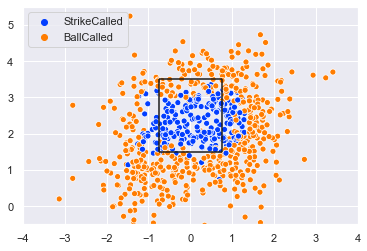

In [4]:
plt.xlim(-4,4)
plt.ylim(-0.5,5.5)
plt.hlines([1.5,3.5],-.75,.75)
plt.vlines([-.75,.75],1.5,3.5)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)

<p>convert our class labels from 'Strike'or 'Ball' to 1 or 0 for our classifier</p>

In [5]:
Yb = np.array([1 if i == 'StrikeCalled' else 0 for i in list(Y)]) # convert pref class to float

<p>create a support vector machines classifier and fit it to our dataset with the 'rbf' kernel</p>
<p>for more info on SVM's <a href="https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72">click here</a> and for more info on how the 'rbf' kernel works specifically, <a href="https://sebastianraschka.com/faq/docs/select_svm_kernels.html">click here</a></p>

In [6]:
clf = svm.SVC(kernel='rbf', gamma=0.7) # initializing the SVM class to use the rbf kernel
clf.fit(X, Yb) # fit the classifier to our data

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<p>next we create a mesh grid and use our classifier to predict the class label of every point in the mesh, this is how the decision boundary is created (a.k.a the estimated umpire strikezone)</p>

In [7]:
h = .01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h)) # grid of every point on the graph
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) # prediction for every point on the grid

<p>to draw the estimated strikezone, we simply create the same graph as before with one extra line of code to add our estimated umpire strikezone</p>

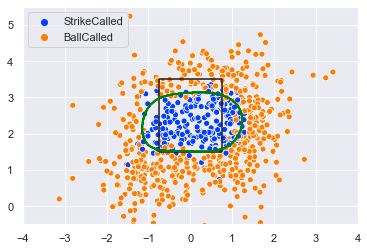

In [8]:
plt.xlim(-4,4)
plt.ylim(-0.5,5.5)
plt.hlines([1.5,3.5],-.75,.75)
plt.vlines([-.75,.75],1.5,3.5)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)
plt.contour(xx, yy, Z, colors='green') # draw boundary line using grid predictions

<p>we can see how accurate our umpire is calling strikes on the "true" strikezone</p>

In [9]:
ballR = 0.11975 # radius of a baseball in feet
z = np.array([1 if ((X[i,0] <= (.75 + ballR)) & (X[i,0] >= (-.75 - ballR)) & (X[i,1] <= (3.5 + ballR)) & (X[i,1] >= (1.5 - ballR))) else 0 for i in range(Yb.shape[0])])
acc = np.sum(z == Yb)/Yb.shape[0]
print('Umpire accuracy to the standard strikezone: {}%'.format(acc*100))

Umpire accuracy to the standard strikezone: 83.01886792452831%


<p>and how accurate the umpire is calling strikes based on his estimated strikezone</p>

In [10]:
clf = svm.SVC(kernel='rbf', gamma=0.7)
clf.fit(X, Yb) 
z = clf.predict(X)
cons = np.sum(z == Yb)/Yb.shape[0]
print('Umpire consistency to their estimated strikezone: {}%'.format(cons*100))

Umpire consistency to their estimated strikezone: 90.83557951482479%
